<a href="https://colab.research.google.com/github/YurajK00/722-Iteration-4/blob/main/Iteration4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/GlobalLandTemperaturesByCountry.csv")
df



,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
159690,1891-04-01,27.710,0.651,Eritrea
159691,1891-05-01,29.506,0.547,Eritrea
159692,1891-06-01,29.298,1.102,Eritrea
159693,1891-07-01,29.149,0.734,Eritrea


dt                                  0
AverageTemperature               9779
AverageTemperatureUncertainty    9041
Country                             1
dtype: int64


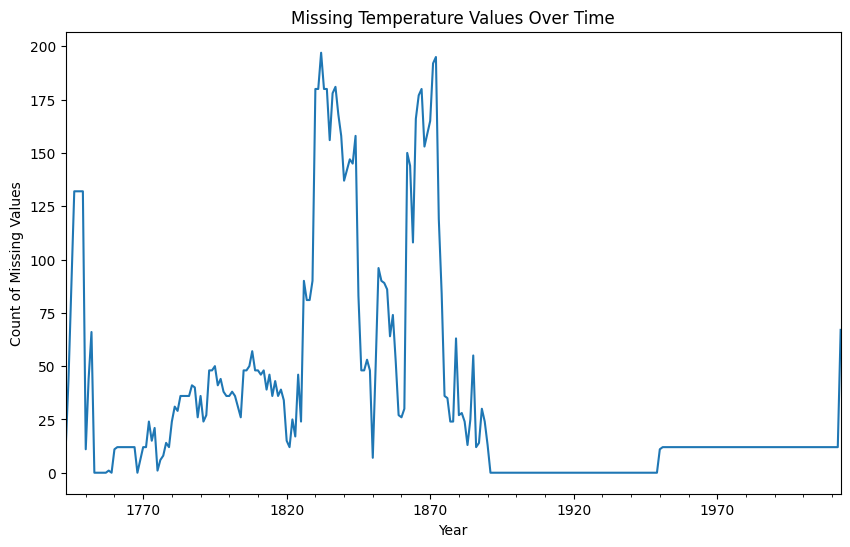

In [ ]:
#To Make all the values standardise, converting dt column to the datetime format
df['dt'] = pd.to_datetime(df['dt'])

#Checking if there any missing null values
print(df.isnull().sum())



#Plotting out the missing values
fig, ax = plt.subplots(figsize=(10, 6))
df.set_index('dt')['AverageTemperature'].isnull().resample('Y').sum().plot(ax=ax)
ax.set_title('Missing Temperature Values Over Time')
ax.set_ylabel('Count of Missing Values')
ax.set_xlabel('Year')
plt.show()











In [ ]:
#It seems lot of the data seems to be missing prior the year 1870. To generalise filtering out the data prior to 1850
data_filtered = df[df['dt'].dt.year >= 1850]

# Check the missing data count after filtering
data_filtered.head(), data_filtered.isnull().sum()




(             dt  AverageTemperature  AverageTemperatureUncertainty Country
 1274 1850-01-01              -9.083                          1.834   Åland
 1275 1850-02-01              -2.309                          1.603   Åland
 1276 1850-03-01              -4.801                          3.033   Åland
 1277 1850-04-01               1.242                          2.008   Åland
 1278 1850-05-01               7.920                          0.881   Åland,
 dt                                   0
 AverageTemperature               12912
 AverageTemperatureUncertainty    12173
 Country                              0
 dtype: int64)

In [ ]:
row_count = len(df)

# Alternatively, you can use the shape attribute
row_count_alt = df.shape[0]

print(f'The dataset contains {row_count} rows.')

The dataset contains 159695 rows.


In [ ]:
#Since there are still couple of missing values in the dataset, using the technique interpolation to estimate or predict values that lie between known data points

data_filtered.loc[:, 'AverageTemperature'] = data_filtered['AverageTemperature'].interpolate(method='linear')
data_filtered.loc[:, 'AverageTemperatureUncertainty'] = data_filtered['AverageTemperatureUncertainty'].interpolate(method='linear')

# Recheck the dataset to ensure the operation was successful
data_filtered.isnull().sum(), data_filtered.head()

data_filtered


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1274,1850-01-01,-9.083,1.834,Åland
1275,1850-02-01,-2.309,1.603,Åland
1276,1850-03-01,-4.801,3.033,Åland
1277,1850-04-01,1.242,2.008,Åland
1278,1850-05-01,7.920,0.881,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


EDA and Visualization

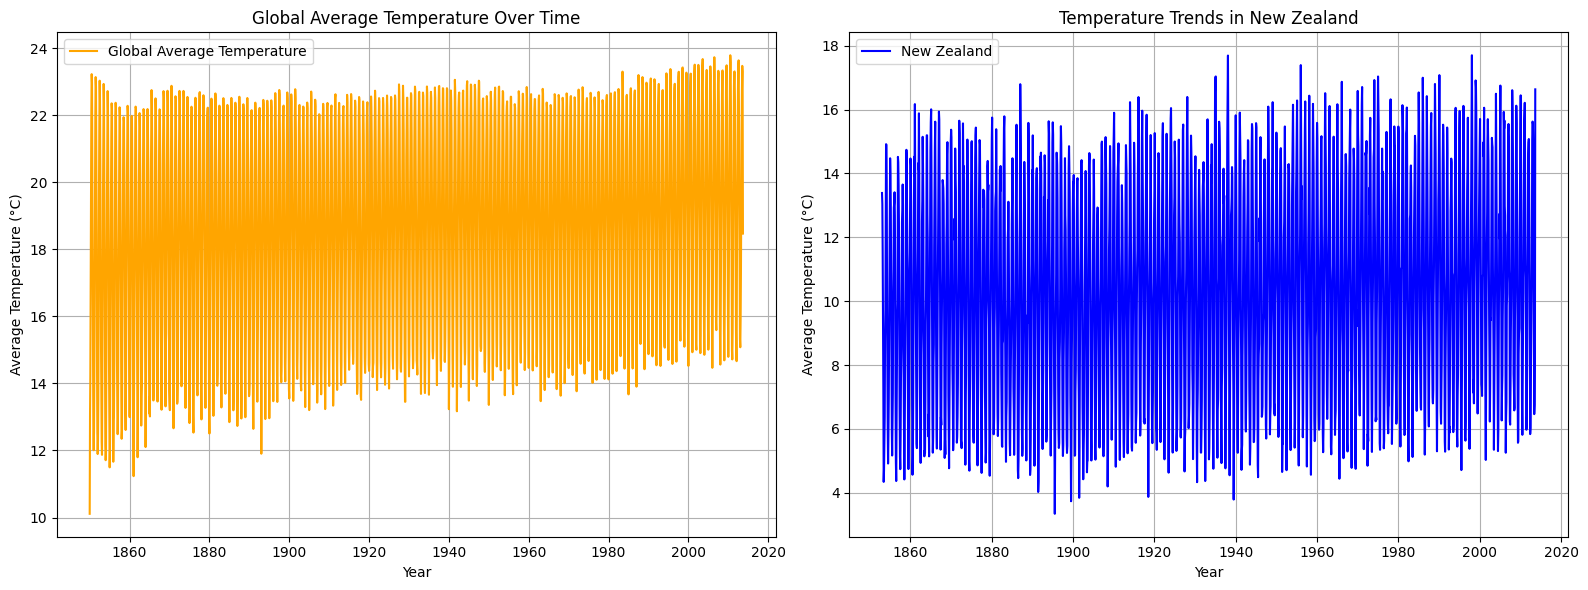

In [ ]:
global_avg_temp = data_filtered.groupby('dt')['AverageTemperature'].mean()

# Filter data for New Zealand
nz_avg_temp = data_filtered[data_filtered['Country'] == 'New Zealand'].groupby('dt')['AverageTemperature'].mean()

# Set Up Subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot Global Average Temperature
ax[0].plot(global_avg_temp.index, global_avg_temp, label='Global Average Temperature', color='orange')
ax[0].set_title('Global Average Temperature Over Time')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Temperature (°C)')
ax[0].legend()
ax[0].grid(True)

# Plot New Zealand Temperature Trends
ax[1].plot(nz_avg_temp.index, nz_avg_temp, label='New Zealand', color='blue')
ax[1].set_title('Temperature Trends in New Zealand')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Temperature (°C)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:

#Calculating statistical methods mean, median, std, variance etc of global temperatures and NZ average temperature
print(global_avg_temp.describe())

print(nz_avg_temp.describe())







count    1965.000000
mean       18.566700
std         3.199223
min        10.111119
25%        15.523396
50%        18.872338
75%        21.612052
max        23.790383
Name: AverageTemperature, dtype: float64
count    1929.000000
mean       10.374484
std         3.474064
min         3.343000
25%         7.255000
50%        10.350000
75%        13.451000
max        17.699000
Name: AverageTemperature, dtype: float64


In [ ]:
#Desribing correlation between the features
data_filtered[['AverageTemperature','AverageTemperatureUncertainty']].corr()

,AverageTemperature,AverageTemperatureUncertainty
AverageTemperature,1.000000,-0.134131
AverageTemperatureUncertainty,-0.134131,1.000000


In [ ]:
#Desribing the info among the features

data_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 465370 entries, 1274 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             465370 non-null  datetime64[ns]
 1   AverageTemperature             465370 non-null  float64       
 2   AverageTemperatureUncertainty  465370 non-null  float64       
 3   Country                        465370 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.8+ MB


Regression

In [ ]:
#Preparing the data
X = np.array(data_filtered['dt'].dt.year).reshape(-1, 1)  #feature
Y = data_filtered['AverageTemperature'].values #target


In [ ]:
# Spliting the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=20)

#Here the test size = 0.2 means that the data is split into 80:20 ratio of training and testing


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(372296, 1)
(93074, 1)
(372296,)
(93074,)


In [ ]:
# Implementing the Linear Regression Model on the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


print(f"Coefficient: {regressor.coef_[0]}")
print(f"Intercept: {regressor.intercept_}")

Coefficient: 0.010588405155498679
Intercept: -1.8824664041619883


In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=['PredictedAverageTemperature'])
Y_pred

,PredictedAverageTemperature
0,19.220225
1,18.171973
2,18.627274
3,18.764924
4,18.267269
...,...
93069,19.294344
93070,18.966103
93071,17.991970
93072,19.135518


In [ ]:
df_pred = pd.DataFrame(columns=['Actual', 'Pred'])

# Assigning actual and predicted values to the DataFrame
df_pred['Actual'] = Y_test
df_pred['Pred'] = Y_pred

# Displaying the DataFrame
print(df_pred)

       Actual       Pred
0      17.761  19.220225
1      24.764  18.171973
2      29.495  18.627274
3      30.757  18.764924
4      27.352  18.267269
...       ...        ...
93069  19.294  19.294344
93070  27.770  18.966103
93071  25.886  17.991970
93072  22.344  19.135518
93073  13.412  18.542567

[93074 rows x 2 columns]


In [ ]:
#Determining the mean errors and r2 score of the test and predict
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('r2 Score:', r2_score(Y_test, Y_pred))

Mean Absolute Error: 8.383267707590704
Root Mean Squared Error: 10.51967500185155
r2 Score: 0.002369594011093268


Visualizing the predicted values

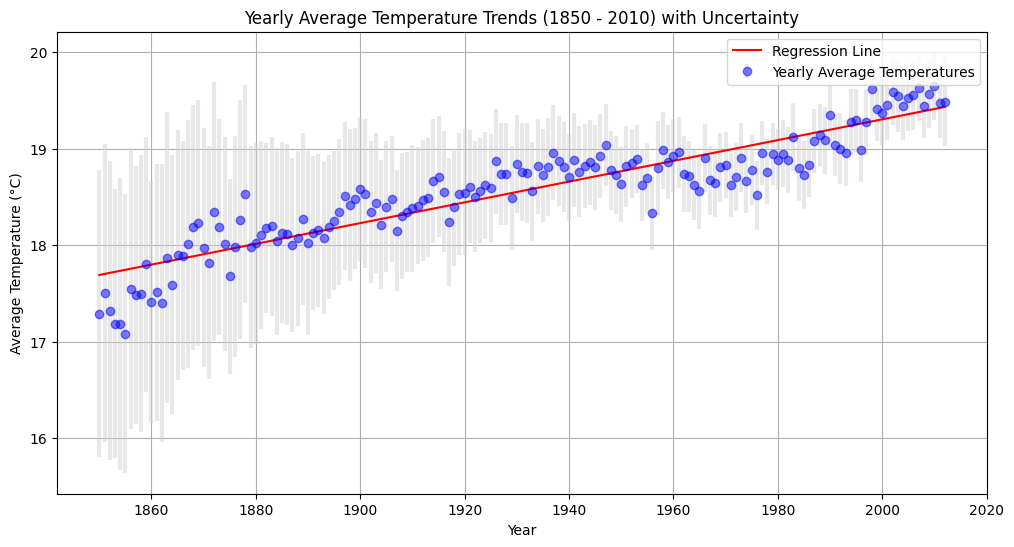

In [ ]:
# Filter data within the year range and ensure no NaN values in 'AverageTemperature' and 'AverageTemperatureUncertainty'
data_reg = data_filtered[(data_filtered['dt'].dt.year >= 1850) & (data_filtered['dt'].dt.year <= 2012)]
data_reg = data_reg.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Calculate yearly averages and uncertainty
yearly_data = data_reg.groupby(data_reg['dt'].dt.year).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()
yearly_data.rename(columns={'dt': 'Year', 'AverageTemperature': 'YearlyAverageTemp',
                            'AverageTemperatureUncertainty': 'YearlyUncertainty'}, inplace=True)

# Prepare the data for regression
X = yearly_data['Year'].values.reshape(-1, 1)
Y = yearly_data['YearlyAverageTemp'].values

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, Y)

# Generate predictions for the plot
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
Y_plot = linear_model.predict(X_plot)

# Plotting
plt.figure(figsize=(12, 6))
plt.errorbar(X, Y, yerr=yearly_data['YearlyUncertainty'].values, fmt='o', color='blue',
             label='Yearly Average Temperatures', alpha=0.5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(X_plot, Y_plot, color='red', label='Regression Line')
plt.title('Yearly Average Temperature Trends (1850 - 2010) with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
unique_values = df['Country'].drop_duplicates()

# Perform value counts on the unique values
value_counts = unique_values.value_counts()

# Print the result
print(value_counts)

Country
Åland            1
Rwanda           1
New Caledonia    1
New Zealand      1
Nicaragua        1
                ..
Georgia          1
Germany          1
Ghana            1
Greece           1
Zimbabwe         1
Name: count, Length: 243, dtype: int64


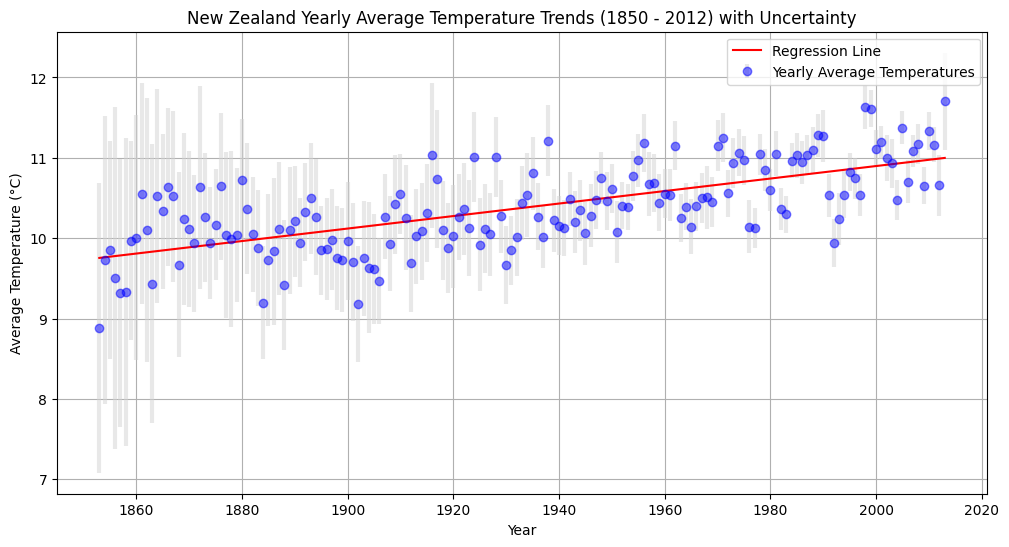

In [ ]:
# Filter data within the year range and ensure no NaN values in 'AverageTemperature' and 'AverageTemperatureUncertainty'
data_reg = data_filtered[(data_filtered['dt'].dt.year >= 1850) & (data_filtered['dt'].dt.year <= 2012)]
data_reg = data_reg.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
nz_data = data_filtered[data_filtered['Country'] == 'New Zealand']
# Calculate yearly averages and uncertainty for New Zealand
nz_yearly_data = nz_data.groupby(nz_data['dt'].dt.year).agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean'
}).reset_index()
nz_yearly_data.rename(columns={'dt': 'Year', 'AverageTemperature': 'NZ_YearlyAverageTemp',
                               'AverageTemperatureUncertainty': 'NZ_YearlyUncertainty'}, inplace=True)
# Prepare the data for regression
X = nz_yearly_data['Year'].values.reshape(-1, 1)
Y = nz_yearly_data['NZ_YearlyAverageTemp'].values

# Create and fit the model
linear_model = LinearRegression()
linear_model.fit(X, Y)

# Generate predictions for the plot
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
Y_plot = linear_model.predict(X_plot)

# Plotting
plt.figure(figsize=(12, 6))
plt.errorbar(X, Y, yerr=nz_yearly_data['NZ_YearlyUncertainty'].values, fmt='o', color='blue',
             label='Yearly Average Temperatures', alpha=0.5, ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(X_plot, Y_plot, color='red', label='Regression Line')
plt.title('New Zealand Yearly Average Temperature Trends (1850 - 2012) with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Coefficient: {linear_model.coef_[0]}")
print(f"Intercept: {linear_model.intercept_}")

Coefficient: 0.007778478053191217
Intercept: -4.659248559910409
